# Figure of Egocentric homing vector.

Most calculations of the scores was done in `homing_vector_histo.ipynb`



In [47]:
%load_ext autoreload
%autoreload 2
%run setup_project.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 44 testing sessions in the list
See myProject and sSesList objects


In [48]:
fn = "/adata/projects/autopi_ca1/results/myMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myMaps = pickle.load(handle)
fn = "/adata/projects/autopi_ca1/results/myHdHist.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myHdHist = pickle.load(handle)
fn = "/adata/projects/autopi_ca1/results/myEhaHist.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myEhaHist = pickle.load(handle)
    

In [49]:
fn = "/adata/projects/autopi_ca1/results/myHdStats.csv" # , data frame with hd stats
hdStats = pd.read_csv(fn)
fn = "/adata/projects/autopi_ca1/results/myEhaStats.csv" # , data frame with hd stats
ehaStats = pd.read_csv(fn)


In [50]:
fb=myProject.dataPath+"/results/"
autoStack = np.load(fb+"autoCorr25Stack.npy")
autoTimestamps = np.load(fb+"autoCorr25TimeStamp.npy")

In [51]:
for k in myMaps:
    print(myMaps[k].shape)
for k in myHdHist:
    print(myHdHist[k].shape)
for k in myEhaHist:
    print(myEhaHist[k].shape)
    
print(hdStats[hdStats.condition=="light"].shape)
print(ehaStats[ehaStats.condition=="light"].shape)
print(autoStack.shape)

(1489, 33, 49)
(1489, 33, 49)
(1489, 33, 49)
(1489, 33, 49)
(1489, 33, 49)
(1489, 33, 49)
(1489, 33, 49)
(1489, 36)
(1489, 36)
(1489, 36)
(1489, 36)
(1489, 36)
(1489, 36)
(1489, 36)
(1489, 6)
(1489, 6)
(1489, 100)


## Filter the data to keep only pyramidal cells

We want to show the maps of pyramidal cells.

In [52]:
fn=myProject.dataPath+"/results/cell_classification.csv"
ct = pd.read_csv(fn)
ct

,id,session,subject,valid,cellType,meanRate,shank,layer
0,mn5824-20112020-0107_80,mn5824-20112020-0107,mn5824,False,NaN,9.201345,4,pyr
1,mn5824-20112020-0107_90,mn5824-20112020-0107,mn5824,False,NaN,8.236764,3,pyr
2,mn5824-20112020-0107_92,mn5824-20112020-0107,mn5824,True,pyr,7.885922,4,pyr
3,mn5824-20112020-0107_96,mn5824-20112020-0107,mn5824,False,NaN,4.153462,1,dn
4,mn5824-20112020-0107_98,mn5824-20112020-0107,mn5824,False,NaN,3.411940,4,pyr
...,...,...,...,...,...,...,...,...
1484,mn9686-01112021-0106_238,mn9686-01112021-0106,mn9686,False,NaN,4.669745,7,dn
1485,mn9686-01112021-0106_240,mn9686-01112021-0106,mn9686,False,NaN,9.647625,2,pyr
1486,mn9686-01112021-0106_241,mn9686-01112021-0106,mn9686,False,NaN,16.161014,2,pyr
1487,mn9686-01112021-0106_242,mn9686-01112021-0106,mn9686,True,pyr,5.270951,1,pyr


In [53]:
if ct.shape[0]!=myMaps["circ80"].shape[0]:
    print("problem with length of cell_classification.csv")

In [54]:
pyrIndices=ct.cellType=="pyr"
pyrId=ct.id[ct.cellType=="pyr"]
print("Pyramidal cells: {}".format(np.sum(ct.cellType=="pyr")))


Pyramidal cells: 472


In [55]:
for key in myMaps:
    myMaps[key]=myMaps[key][pyrIndices]
for key in myHdHist:
    myHdHist[key]=myHdHist[key][pyrIndices]
for key in myEhaHist:
    myEhaHist[key]=myEhaHist[key][pyrIndices]
    

In [56]:
hdStats = hdStats[hdStats.cellId.isin(pyrId)]
ehaStats = ehaStats[ehaStats.cellId.isin(pyrId)]
hdStats.shape,ehaStats.shape

((3304, 6), (3304, 6))

In [57]:
pyrId = pyrId.reset_index(drop=True)

0.0049736410124855
-0.003990449494031212
0.009281879599694697


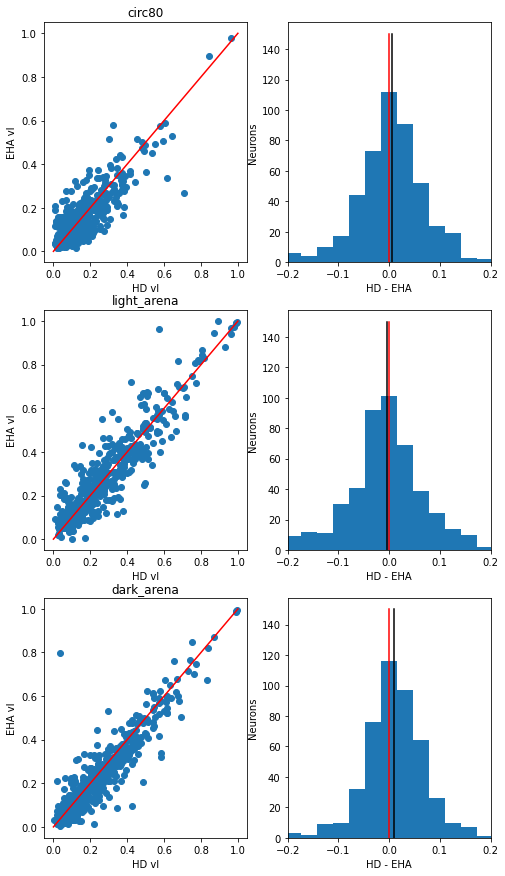

In [65]:
fig,ax = plt.subplots(3,2,figsize=(8,15))

bins = np.linspace(-0.3,0.3,20)

for i,cond in enumerate(["circ80","light_arena","dark_arena"]):
    ax[i,0].scatter(hdStats.vectorLength[hdStats.condition==cond],ehaStats.vectorLength[ehaStats.condition==cond])
    ax[i,0].plot([0,1],[0,1],c="red")
    ax[i,0].set_xlabel("HD vl")
    ax[i,0].set_ylabel("EHA vl")
    ax[i,0].set_title(cond)

    ax[i,1].hist(hdStats.vectorLength[hdStats.condition==cond]-ehaStats.vectorLength[ehaStats.condition==cond],bins=bins)
    ax[i,1].set_xlim(-0.2,0.2)
    ax[i,1].set_xlabel("HD - EHA")
    ax[i,1].set_ylabel("Neurons")
    ax[i,1].plot([0,0],[0,150],c="red")
    
    myMedian=np.nanmedian(hdStats.vectorLength[hdStats.condition==cond]-ehaStats.vectorLength[ehaStats.condition==cond])
    ax[i,1].plot([myMedian,myMedian],[0,150],c="black")
    print(myMedian)
    
plt.show()